# Udacity - Data Analyst NanoDegree Program
## Project #2: Investigate a Dataset: Global Fossil-Fuel CO2 Emissions
### Data source: Link from GapMinder
> - Reference: http://cdiac.ess-dive.lbl.gov/ftp/ndp030/nation.1751_2014.ems
> - Reference: http://cdiac.ess-dive.lbl.gov/trends/emis/overview_2014.html


> By Samuel Jiménez Sanabria
### Description


>Since 1751 just over 400 billion metric tonnes of carbon have been released to the atmosphere from the consumption of fossil fuels and cement production. Half of these fossil-fuel CO2 emissions have occurred since the late 1980s. The 2014 global fossil-fuel carbon emission estimate, 9855 million metric tons of carbon, represents an all-time high and a 0.8% increase over 2013 emissions. The slight increase continues a three-year trend of modest annual growth under 2% per year. This modest growth comes on the heels of a quick recovery from the 2008-2009 Global Financial Crisis which had obvious short-term economic and energy use consequences, particularly in North America and Europe.

> Globally, liquid and solid fuels accounted for 75.1% of the emissions from fossil-fuel burning and cement production in 2014. Combustion of gas fuels (e.g., natural gas) accounted for 18.5% (1823 million metric tons of carbon) of the total emissions from fossil fuels in 2014 and reflects a gradually increasing global utilization of natural gas. Emissions from cement production (568 million metric tons of carbon in 2014) have more than doubled in the last decade and now represent 5.8% of global CO2 releases from fossil-fuel burning and cement production. Gas flaring, which accounted for roughly 2% of global emissions during the 1970s, now accounts for less than 1% of global fossil-fuel releases.

> Boden, T.A., G. Marland, and R.J. Andres. 2017. Global, Regional, and National Fossil-Fuel CO2 Emissions. Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, Oak Ridge, Tenn., U.S.A. doi 10.3334/CDIAC/00001_V2017

<a id='intro'></a>
## Introduction

In this project I’ve compared measurements of world global carbon emissions. The dataset contains data from 1751 to 2014 but given the amount of data missing before 1950 I've opted for studying the data from 1950 to 2014 only.
The steps to accomplish the analysis have been the following:
> 1. Import the dataset and study it's contents to understand the data.
> 2. Clean the data to fix problems and organize the dataset.
> 3. Create plots for visualisation.
> 4. Conclusions.

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



In [264]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### About the measures
All emission estimates are expressed in ***thousand metric tons of carbon***. To
convert these estimates to units of carbon dioxide (CO2), simply multiply
these estimates by 3.667.

Per capita emission estimates are expressed in metric tons of carbon.
Population estimates were not available to permit calculations
of global per capita estimates before 1950.  Please note that annual sums
were tallied before each element (e.g., Gas) was rounded and reported here
so totals may differ slightly from the sum of the elements due to rounding.

### Dataset Read

In [265]:
co2_data = pd.read_csv('datasets/co2_all.csv')

In [266]:
# Create a basic function to check basic dataframe information:
def df_quickcheck(df_name):
   
    """Input the name of the dataset to be checked as the only 
    argument when you call the function."""
    
    print("\033[1m This is the shape of the dataframe:\n\033[0m", df_name.shape)
    print("\033[1m A look at the first lines:\n\033[0m", df_name.head())
    print("\033[1m Column types:\n\033[0m", df_name.dtypes)

In [267]:
# We quickcheck the loaded dataframe
df_quickcheck(co2_data)

 This is the shape of the dataframe:
 (17235, 10)
 A look at the first lines:
                                               Nation    Year  \
0              (Note: missing values denoted by ".")     NaN   
1  Source: Tom Boden and Bob Andres (Oak Ridge Na...     NaN   
2                     DOI: 10.3334/CDIAC/00001_V2017     NaN   
3                                        AFGHANISTAN  1949.0   
4                                        AFGHANISTAN  1950.0   

   Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)  \
0                                                NaN                                         
1                                                NaN                                         
2                                                NaN                                         
3                                                4.0                                         
4                                               23.0              

<a id='wrangling'></a>
## Data Wrangling

In [268]:
co2_data.head()

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
0,"(Note: missing values denoted by ""."")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Source: Tom Boden and Bob Andres (Oak Ridge Na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DOI: 10.3334/CDIAC/00001_V2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,1949.0,4.0,4,0,0,0.0,.,.,0.0
4,AFGHANISTAN,1950.0,23.0,6,18,0,0.0,0,0,0.0


In [269]:
# co2_data.describe() returns errors (wrong column types) in several columns. This is explained and fixed below

In [270]:
# Explore column names
co2_data.columns.tolist()

['Nation',
 'Year',
 'Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)',
 'Emissions from solid fuel consumption',
 'Emissions from liquid fuel consumption',
 'Emissions from gas fuel consumption',
 'Emissions from cement production',
 'Emissions from gas flaring',
 'Per capita CO2 emissions (metric tons of carbon)',
 'Emissions from bunker fuels (not included in the totals)']

## Data Cleaning 

### Changing Labels

In [271]:
new_labels = ['country', 'year', 'total_fosil_fuel_cement_prod', 'solid_fuel_consum',
          'liquid_fuel_consum', 'gas_fuel_consum', 'cement_prod',
          'gas_flaring', 'co2_emiss_pc', 'bunker_fuels']

co2_data.columns = new_labels

In [272]:
# View new labels
co2_data.columns.tolist()

['country',
 'year',
 'total_fosil_fuel_cement_prod',
 'solid_fuel_consum',
 'liquid_fuel_consum',
 'gas_fuel_consum',
 'cement_prod',
 'gas_flaring',
 'co2_emiss_pc',
 'bunker_fuels']

In [273]:
# Verify new labels
co2_data.head(1)

,country,year,total_fosil_fuel_cement_prod,solid_fuel_consum,liquid_fuel_consum,gas_fuel_consum,cement_prod,gas_flaring,co2_emiss_pc,bunker_fuels
0,"(Note: missing values denoted by ""."")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
# Drop "total_fosil_fuel_cement_prod" as we'll sum ourselves if needed
co2_data.drop(labels='total_fosil_fuel_cement_prod', axis=1, inplace=True, errors='raise')

In [275]:
# Drop first three rows
co2_data = co2_data.drop([0, 1, 2])

In [276]:
# 'Title' (lower case with capital first letter) country names on column "Country"
co2_data['country'] = co2_data['country'].str.title()

### Fixing Error Values
Upon trying to convert columns to the right types a series of errors are returned so the following needed to be done: 
- Remove '.' from object cells
- Fill empty cells with NaN values
- Fill all NaN with values of 0

In [277]:
# Column types
co2_data.dtypes

country                object
year                  float64
solid_fuel_consum      object
liquid_fuel_consum     object
gas_fuel_consum        object
cement_prod           float64
gas_flaring            object
co2_emiss_pc           object
bunker_fuels          float64
dtype: object

In [278]:
# Remove dots from wrong 'object' columns 

drop_dots = ['solid_fuel_consum', 'liquid_fuel_consum', 
             'gas_fuel_consum', 'gas_flaring', 'co2_emiss_pc']

for c in drop_dots:
    co2_data[c] = co2_data[c].map(lambda x: x.lstrip('.'))
   

In [279]:
# Fill empty cells with NaN
co2_data.replace('', np.nan, inplace=True)

In [280]:
#Fill NaN with 0
co2_data.fillna(0, inplace=True)

In [281]:
# Verify removed NaNs
co2_data.isna().sum()

country               0
year                  0
solid_fuel_consum     0
liquid_fuel_consum    0
gas_fuel_consum       0
cement_prod           0
gas_flaring           0
co2_emiss_pc          0
bunker_fuels          0
dtype: int64

### Fixing Column Types

In [282]:
# Convert all to 'float'. Keep 'year' as 'int' and 'country' as 'str'

co2_data.year = co2_data.year.astype(int)

conv_types = ['solid_fuel_consum', 'liquid_fuel_consum', 
             'gas_fuel_consum', 'gas_flaring', 'co2_emiss_pc']

for c in conv_types:
    co2_data[c] = co2_data[c].astype(float)

In [283]:
# Verify column types
co2_data.dtypes

country                object
year                    int64
solid_fuel_consum     float64
liquid_fuel_consum    float64
gas_fuel_consum       float64
cement_prod           float64
gas_flaring           float64
co2_emiss_pc          float64
bunker_fuels          float64
dtype: object

In [284]:
# Finally all 'describe' and mathematical operations work as expected
co2_data.describe()

,year,solid_fuel_consum,liquid_fuel_consum,gas_fuel_consum,cement_prod,gas_flaring,co2_emiss_pc,bunker_fuels
count,17232.000000,1.723200e+04,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000
mean,1961.579561,1.107010e+04,7589.085829,3189.767700,638.453865,199.718489,0.907776,560.330606
std,44.251691,6.206518e+04,39057.928585,20714.456024,6631.010202,1087.880733,2.194268,2414.320487
min,1751.000000,-1.030000e+02,-4663.000000,-40.000000,0.000000,0.000000,-0.680000,0.000000
25%,1944.000000,0.000000e+00,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,5.400000e+01,263.000000,0.000000,7.000000,0.000000,0.130000,4.000000
75%,1995.000000,2.002500e+03,2165.750000,71.000000,162.000000,0.000000,1.010000,133.000000
max,2014.000000,2.045156e+06,680284.000000,390719.000000,338912.000000,20520.000000,45.960000,45630.000000


Data from many countries is missing before 1950 so we'll limit the analysis to study the data between 1950 to 2014

In [285]:
# Cut down data before 1950
co2_data_50 = co2_data.query('year >= 1950')
#Save dataframe
co2_data_50.to_csv('co2_data_50.csv')

### From 1950 to 2014
 From this point we'll work with the new dataset co2_data_50

In [286]:
# We quickcheck the new prepared dataframe using the df_quickcheck function
df_quickcheck(co2_data_50)

 This is the shape of the dataframe:
 (12462, 9)
 A look at the first lines:
        country  year  solid_fuel_consum  liquid_fuel_consum  gas_fuel_consum  \
4  Afghanistan  1950                6.0                18.0              0.0   
5  Afghanistan  1951                7.0                18.0              0.0   
6  Afghanistan  1952                9.0                17.0              0.0   
7  Afghanistan  1953               10.0                18.0              0.0   
8  Afghanistan  1954               12.0                18.0              0.0   

   cement_prod  gas_flaring  co2_emiss_pc  bunker_fuels  
4          0.0          0.0           0.0           0.0  
5          0.0          0.0           0.0           0.0  
6          0.0          0.0           0.0           0.0  
7          0.0          0.0           0.0           0.0  
8          0.0          0.0           0.0           0.0  
 Column types:
 country                object
year                    int64
solid_fuel_consum

<a id='eda'></a>
## Exploratory Data Analysis

In [287]:
# Statistics
co2_data_50.describe()

,year,solid_fuel_consum,liquid_fuel_consum,gas_fuel_consum,cement_prod,gas_flaring,co2_emiss_pc,bunker_fuels
count,12462.00000,1.246200e+04,12462.000000,12462.000000,12462.000000,12462.000000,12462.000000,12462.000000
mean,1983.90467,1.106395e+04,9908.755978,4312.304446,865.768255,276.163457,1.255239,774.804766
std,18.60897,6.887335e+04,45166.614562,24198.353108,7783.967529,1270.984904,2.494336,2809.633587
min,1950.00000,-3.100000e+01,-4663.000000,-40.000000,0.000000,0.000000,-0.680000,0.000000
25%,1968.00000,0.000000e+00,90.000000,0.000000,0.000000,0.000000,0.090000,1.000000
50%,1985.00000,3.000000e+00,534.500000,0.000000,34.000000,0.000000,0.420000,34.000000
75%,2000.00000,9.977500e+02,4178.000000,539.000000,310.750000,0.000000,1.600000,298.000000
max,2014.00000,2.045156e+06,680284.000000,390719.000000,338912.000000,20520.000000,45.960000,45630.000000


In [288]:
# Statistics by fuel type
co2_data_50.mean()

year                   1983.904670
solid_fuel_consum     11063.953378
liquid_fuel_consum     9908.755978
gas_fuel_consum        4312.304446
cement_prod             865.768255
gas_flaring             276.163457
co2_emiss_pc              1.255239
bunker_fuels            774.804766
dtype: float64

In [289]:
# Extract Date and Country columns to plot averages
co2_extract = co2_data_50.iloc[:, 2:9]
# Compare averages to verify extraction
co2_extract.mean()

solid_fuel_consum     11063.953378
liquid_fuel_consum     9908.755978
gas_fuel_consum        4312.304446
cement_prod             865.768255
gas_flaring             276.163457
co2_emiss_pc              1.255239
bunker_fuels            774.804766
dtype: float64

### Research Question: What type of fuel is releasing the most amount of carbon into the atmosphere?  )

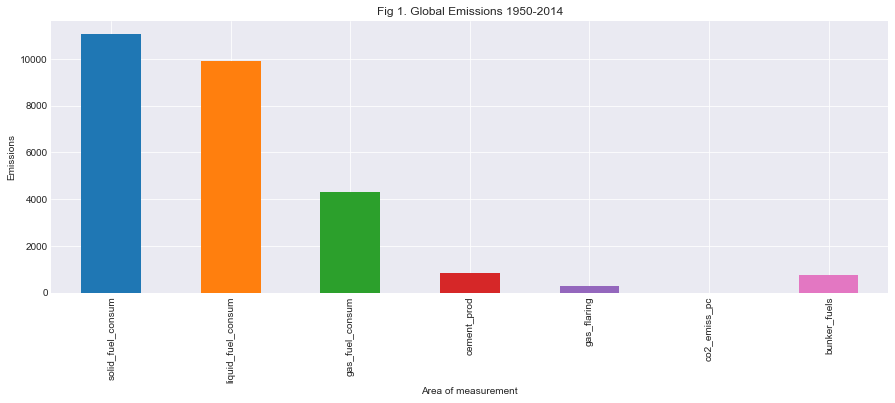

In [290]:
co2_extract.mean().plot(kind='bar', figsize=(15, 5))
plt.xlabel("Area of measurement")
plt.ylabel("Emissions")
plt.title("Fig 1. Global Emissions 1950-2014")
plt.show();

### Global Emissions: What coutries are responsible for the highest volume of emissions? 


In [291]:
# Extract the mean of the countries with the highest emissions
country_mean = co2_data_50.groupby('country').solid_fuel_consum.mean()
ordered_cm = country_mean.sort_values(ascending=False)
ordered_cm.iloc[:15]

country
China (Mainland)                     553570.492308
United States Of America             407401.600000
Ussr                                 307090.904762
Russian Federation                   124335.347826
India                                109686.738462
Federal Republic Of Germany           98968.439024
Germany                               91440.166667
United Kingdom                        75883.769231
Japan                                 71037.430769
Poland                                68668.569231
Former German Democratic Republic     67928.682927
South Africa                          61089.030769
Ukraine                               44509.130435
Czechoslovakia                        39151.166667
Australia                             33422.876923
Name: solid_fuel_consum, dtype: float64

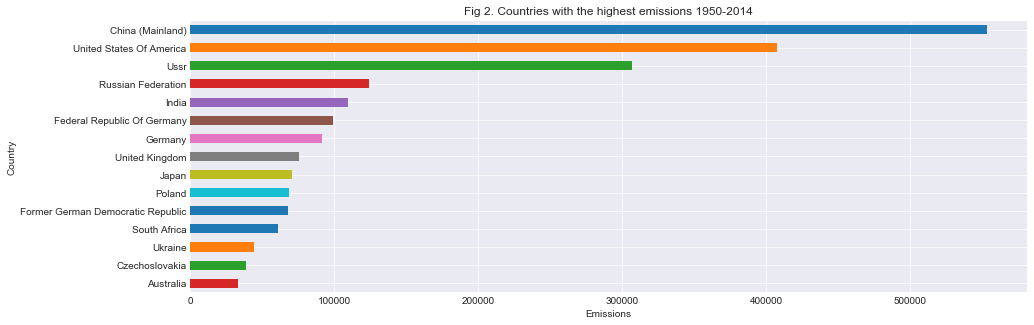

In [292]:
# Plot the result
ordered_cm.iloc[:15].plot(kind='barh', figsize=(15,5))
plt.gca().invert_yaxis()
plt.xlabel("Emissions")
plt.ylabel("Country")
plt.title("Fig 2. Countries with the highest emissions 1950-2014")
plt.show();

### Looking at solid and liquid fuel emissions, can we observe a global trend?

In [293]:
# Extract a dataframe with only the year, solid, and  liquid fuel consumption
global_trend = co2_data_50.iloc[:, np.r_[:, 1:4]]
global_trend.head(1)

,year,solid_fuel_consum,liquid_fuel_consum
4,1950,6.0,18.0


In [294]:
# Sort columns
global_trend = global_trend.sort_values(by=['year', 'solid_fuel_consum', 'liquid_fuel_consum'])

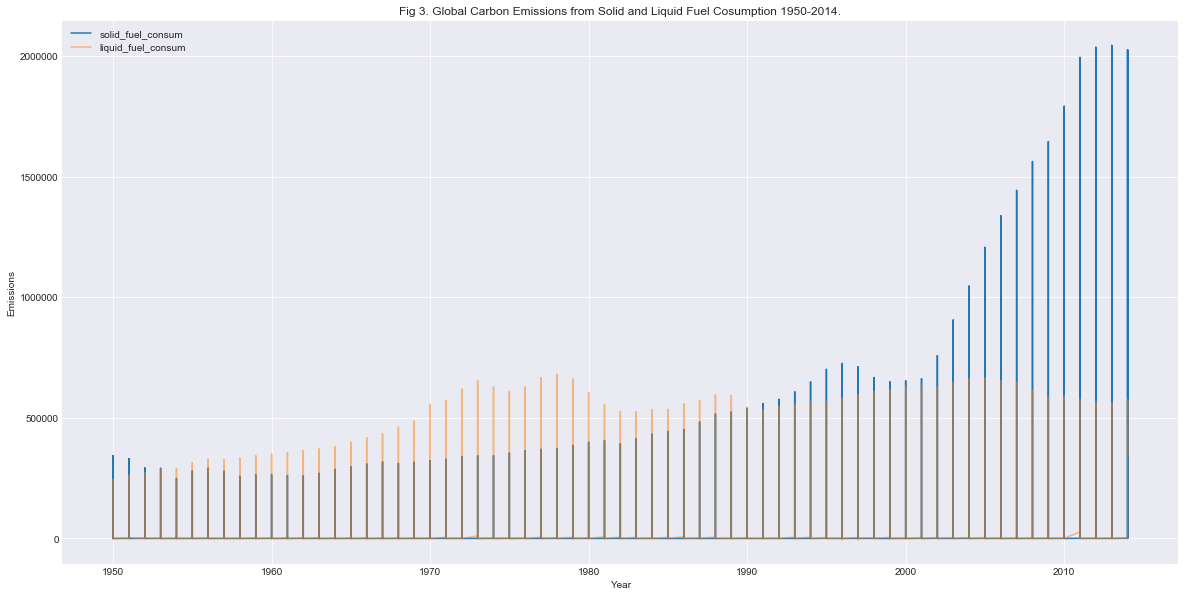

In [295]:
# Plot comparison of fuels from 1950-2014
ax = plt.gca()
global_trend.sort_values(by=['year']).plot(kind='line', x='year', y='solid_fuel_consum',
                                           figsize=(20,10), color='C0', alpha=1, ax=ax)
global_trend.sort_values(by=['year']).plot(kind='line', x='year', y='liquid_fuel_consum',
                                           figsize=(20,10), color='C1', alpha=0.5, ax=ax)
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.title("Fig 3. Global Carbon Emissions from Solid and Liquid Fuel Cosumption 1950-2014.")
plt.show()

### Research Question: How do different countries compare in Per Capita emissions?
Comparing Emissions Per Capita in Spain, Sweden, South Africa and USA

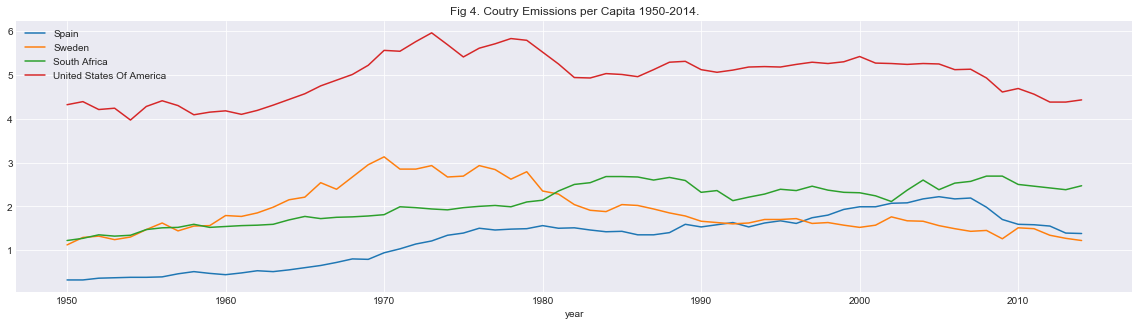

In [296]:
ax = plt.gca()
co2_data_50.query('country == "Spain"').plot(x='year', y='co2_emiss_pc', 
                                        kind='line', figsize=(20, 5), ax=ax, label='Spain');
co2_data_50.query('country == "Sweden"').plot(x='year', y='co2_emiss_pc', 
                                        kind='line', figsize=(20, 5), ax=ax, label='Sweden');
co2_data_50.query('country == "South Africa"').plot(x='year', y='co2_emiss_pc', 
                                        kind='line', figsize=(20, 5), ax=ax, label='South Africa');
co2_data_50.query('country == "United States Of America"').plot(x='year', y='co2_emiss_pc', 
                                        kind='line', figsize=(20, 5), ax=ax, label='United States Of America');
plt.title("Fig 4. Coutry Emissions per Capita 1950-2014.")
plt.show()

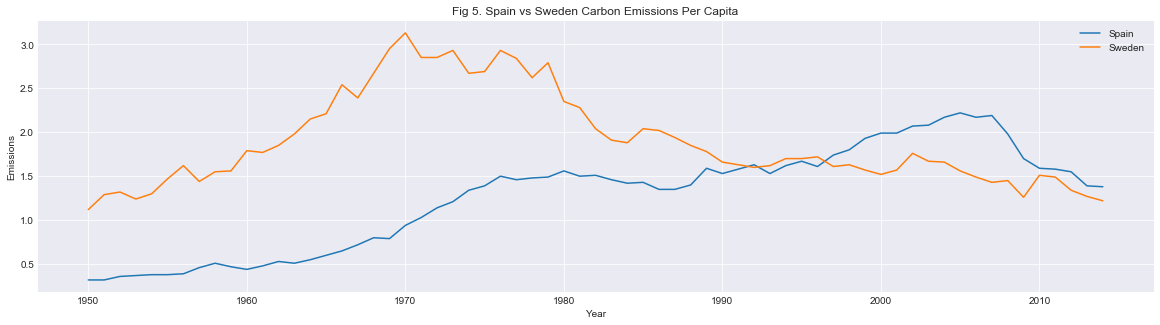

In [297]:
ax = plt.gca()
co2_data_50.query('country == "Spain"').plot(kind='line',x='year',y='co2_emiss_pc', color='C0', 
                                        figsize=(20,5), ax=ax, label="Spain")
plt.xlabel("Year")
plt.ylabel("Emissions")
co2_data_50.query('country == "Sweden"').plot(kind='line',x='year',y='co2_emiss_pc', color='C1', 
                                        figsize=(20,5), ax=ax, label="Sweden")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.title("Fig 5. Spain vs Sweden Carbon Emissions Per Capita")
plt.show()

### Research Question: Is here any correlation between solid and liquid fuel emissions? How about if we compare two countries?
Here we will search for correlation between data from Spain and Sweden

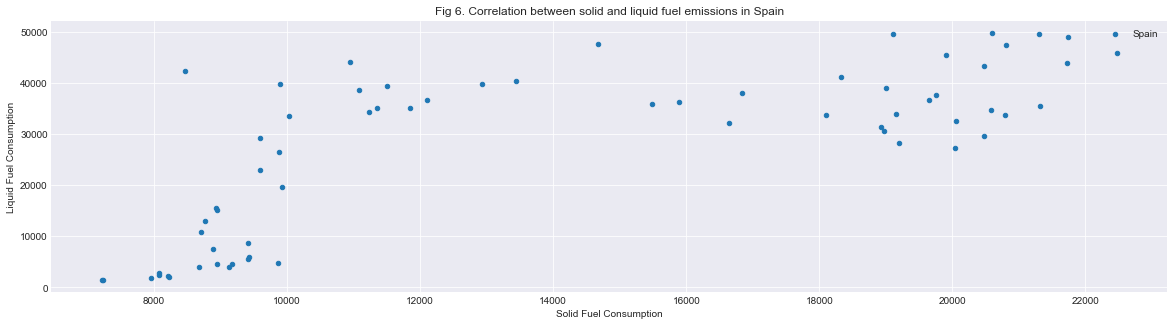

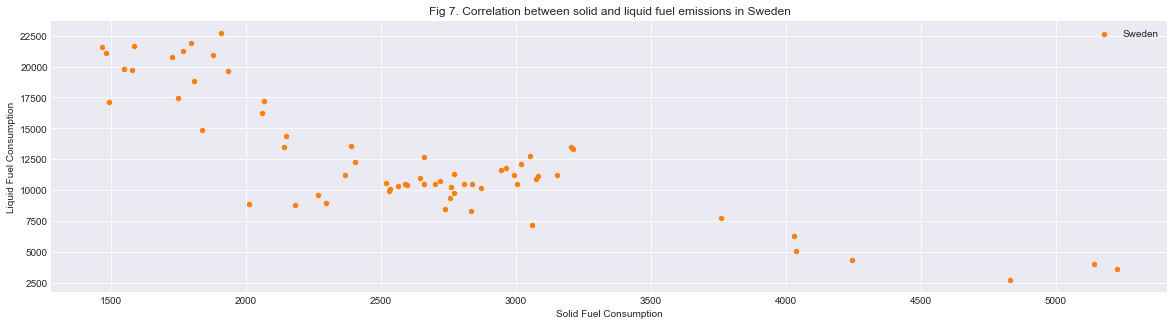

In [298]:
co2_data_50.query('country == "Spain"' ).plot(kind='scatter',x='solid_fuel_consum',y='liquid_fuel_consum', 
                                         color='C0', figsize=(20,5), label="Spain")
plt.title("Fig 6. Correlation between solid and liquid fuel emissions in Spain")
plt.xlabel("Solid Fuel Consumption")
plt.ylabel("Liquid Fuel Consumption")

co2_data_50.query('country == "Sweden"' ).plot(kind='scatter',x='solid_fuel_consum',y='liquid_fuel_consum', 
                                         color='C1', figsize=(20,5), label="Sweden")
plt.title("Fig 7. Correlation between solid and liquid fuel emissions in Sweden")
plt.xlabel("Solid Fuel Consumption")
plt.ylabel("Liquid Fuel Consumption")

plt.show()


In [299]:
# Finally, individual emissions by country can be consulted with the following funcion:
# This function can be deveoped ever further so the only argument is "country_name".
def plot_country(query):   
    co2_data_50.query(query).plot(kind='line', x='year', y='co2_emiss_pc', 
                                  figsize=(20,5), label=query, 
                                  title='Level of emissions Per Capita in {}'.format(query))
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.show()

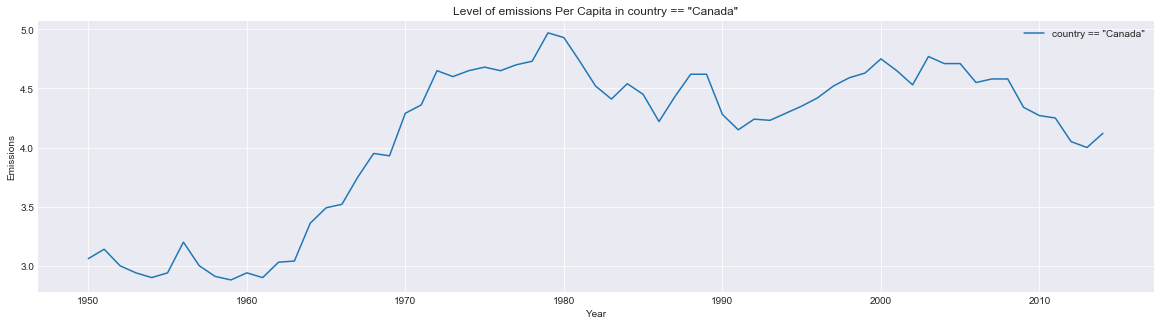

In [300]:
# Example Canada
# Replace "Canada" by the name of the country you want to consult. 
plot_country('country == "Canada"')

<a id='conclusions'></a>
## Conclusions

***About the dataset's limitations:*** The dataset contained a lot of empty cells and cells that contained only dots. Column types were wrong and and a lot of data was missing for many countries. This meant that the process of understanding the data, deciding what direction to take and clean and prepare the data took a long time. 
The dataset presents data classified by Country, Year and Types of Fuel only, which is in my opinion, a bit limited and restrict the questions that could be answered. I talk a bit more about this below. But the data provides good general insights about general polution levels. I could ask concrete questions and find answers to them.

***Global trends:*** The first general observetion we can make looking at the data and graphs is that emissions to the atmosphere have been increasing since the fifties. Liquid carbon emissions increased more during the seventies and solid carbon emissions increased abruptly after the year 2000, placing the level of solid carbon emissions on a much higher level than emisions from liquid fluids. This trend seems to stop around 2010, point where these two types of fuel are the biggest factors of carbon emissions. 

***Per Capita Emissions Compared:*** A peak around 2010 shows a stop in this global trend, some countries like Sweden seem to be able to stop and lower their Per Capita emissions already since the seventies. Other countries like Spain start lowering their emissions much later.
The Emissions per Capita values in Figure 4 show how a country with generally high emissions like USA also have been lowering their level of emissions since the late seventies. On the contrary, in other countries like South Africa or Spain the trend from the fifties look to have been raising up until just before 2010. 
The differences between the levels of emissions from different countries are noticiable. Differences that are probably dependent on many factors like country size, number of habitants, industries, etc...
Unfortunately, other types of data than the fuel types are not included in the dataset, what makes impossible to draw conclusions based on other factors. For example, how affect taxes or fuel prices the Per Capita CO2 emissions? This data won't give us answers to these questions.

***Correlation:*** We can also observe that there is indeed a correlation between the emissions from liquid fuels and emissions from solid fuels. This correlation can be positive or negative. Figures 6 and 7 show how in Spain higher levels from solid fuels mean also almost steadly higher levels from liquid levels. In Sweden on the contrary the correlation is negative: higher levels from solid fuels mean lower levels produced by liquid fuels.

Generally, we could conclude that global efforts are giving generally positive results. These results are visible thou this analysis shows only a limited point of view were we can see very generalized trends only based on types of fuel.

Samuel Jiménez Sanabria
